## Simulations

__EzTao__ provides the tools to easily simulate CARMA processes given a valid (stationary) CARMA kernel. There are three functions in the [eztao.ts.carma_sim](../python/ts.rst#module-eztao.ts.carma_sim) module that can be used to simulate CARMA processes.

- `gpSimFull`: Simulate CARMA processes with a uniform time sampling.
- `gpSimRand`: Simulate CARMA processes with random time sampling (time stamps are drawn from a uniform distribution).
- `gpSimByTime`: Simulate CARMA processes at fixed input time stamps.

Each function takes a CARMA kernel as the first argument along with other arguments (please see the [API](../python/ts.rst#module-eztao.ts.carma_sim) for more detail). 

<div class="alert alert-info">

Note

1. The above functions require a `SNR` argument, which is defined as the ratio between the variability (RMS) amplitude of the input CARMA model and the median of the measurement errors. 
2. The returned time series has the measurement errors added to y. 
3. The measurement errors are simulated using a log normal distribution and are assigned to 'measurements'/y in a heteroskedastic manner.

</div>

Next, we will simulate CARMA processes using a DHO/CARMA(2,1) and a CARMA(5,2) model (no particular reason for choosing these two models).

In [1]:
# general packages
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# eztao imports
import eztao
from eztao.carma import DHO_term, CARMA_term
from eztao.ts import gpSimFull, gpSimByTime
from eztao.ts.carma_fit import sample_carma

mpl.rc_file(os.path.join(eztao.__path__[0], "viz/eztao.rc"))

#### Simulate a CARMA(2,1) process
- ##### At uniformly-spaced time stamps (use ``gpSimFull``)

In [2]:
# define a DHO/CARMA(2,1) kernel
dho_kernel = DHO_term(np.log(0.04), np.log(0.0027941), np.log(0.004672), 
                      np.log(0.0257))

# simulate two time series
nLC = 2 
SNR = 20
duration = 365*3.0
npts = 1000
t, y, yerr = gpSimFull(dho_kernel, SNR, duration, npts, nLC=nLC, log_flux=False)

In [3]:
print(f'The number returned time series: {y.shape[0]}')

The number returned time series: 2


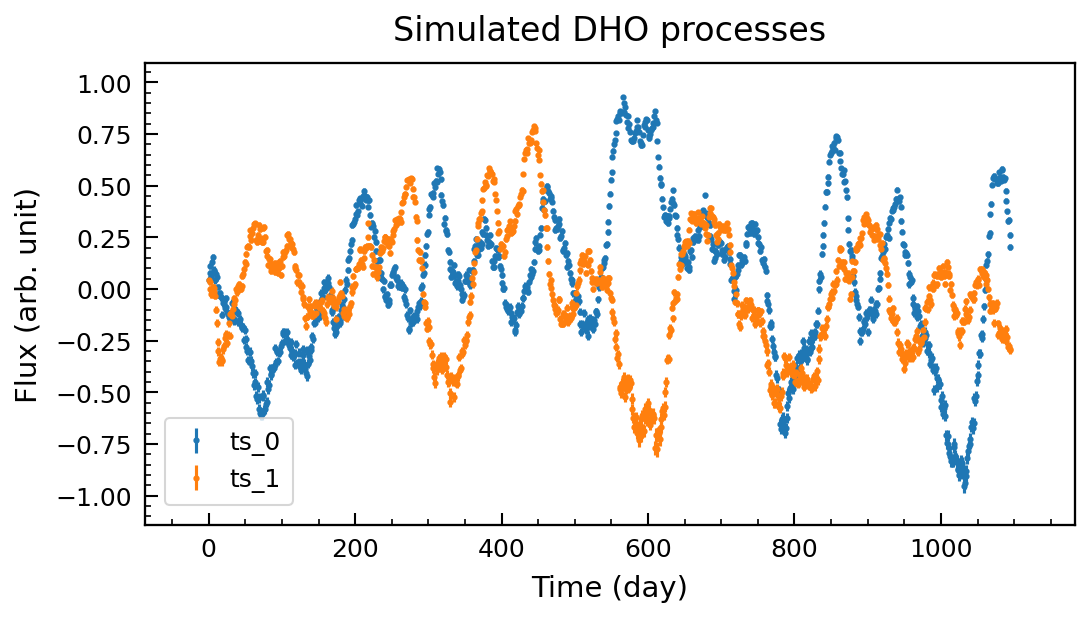

In [4]:
# plot the simulated process
fig, ax = plt.subplots(1,1, dpi=150, figsize=(8,4))

for i in range(nLC):
    ax.errorbar(t[i], y[i], yerr[i], fmt='.', label=f'ts_{i}', markersize=4)

ax.set_xlabel('Time (day)')
ax.set_ylabel('Flux (arb. unit)')
ax.set_title('Simulated DHO processes')
ax.legend(markerscale=1, loc=3)

- ##### At fixed input time stamps (use ``gpSimByTime``)

In [5]:
# randomly draw time stamps from a log distribution
tIn = np.logspace(0, np.log10(1000), 500)

# simulate
SNR = 20
tOut, yOut, yerrOut = gpSimByTime(dho_kernel, SNR, tIn, nLC=nLC, log_flux=False)

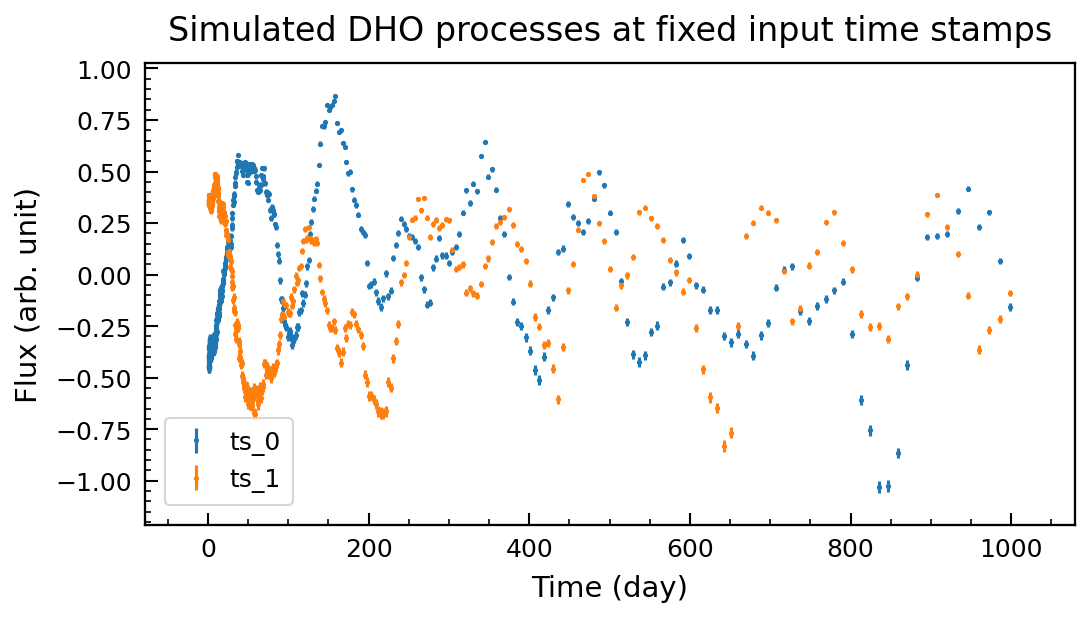

In [6]:
# plot the simulated process
fig, ax = plt.subplots(1,1, dpi=150, figsize=(8,4))

for i in range(nLC):
    ax.errorbar(tOut[i], yOut[i], yerrOut[i], fmt='.', label=f'ts_{i}', markersize=3)

ax.set_xlabel('Time (day)')
ax.set_ylabel('Flux (arb. unit)')
ax.set_title('Simulated DHO processes at fixed input time stamps')
ax.legend(markerscale=1, loc=3)

#### Simulate a CARMA(5,2) process
- ##### At uniformly-spaced time stamps (use ``gpSimFull``)

In [7]:
# define a CARMA(5,2) kernel
ARpars = [6.39255585e-01, 8.19334579e-01, 4.74749350e-01, 
          4.08631157e-02, 7.22707479e-04]
MApars = [7.04646183, 0.10365114, 0.79552856]
carma_kernel = CARMA_term(np.log(ARpars), np.log(MApars))

# simulate two time series
nLC = 2 
SNR = 20
duration = 365*3.0
npts = 1000
t, y, yerr = gpSimFull(carma_kernel, SNR, duration, npts, nLC=nLC, log_flux=False)

In [8]:
print(f'The number returned time series: {y.shape[0]}')

The number returned time series: 2


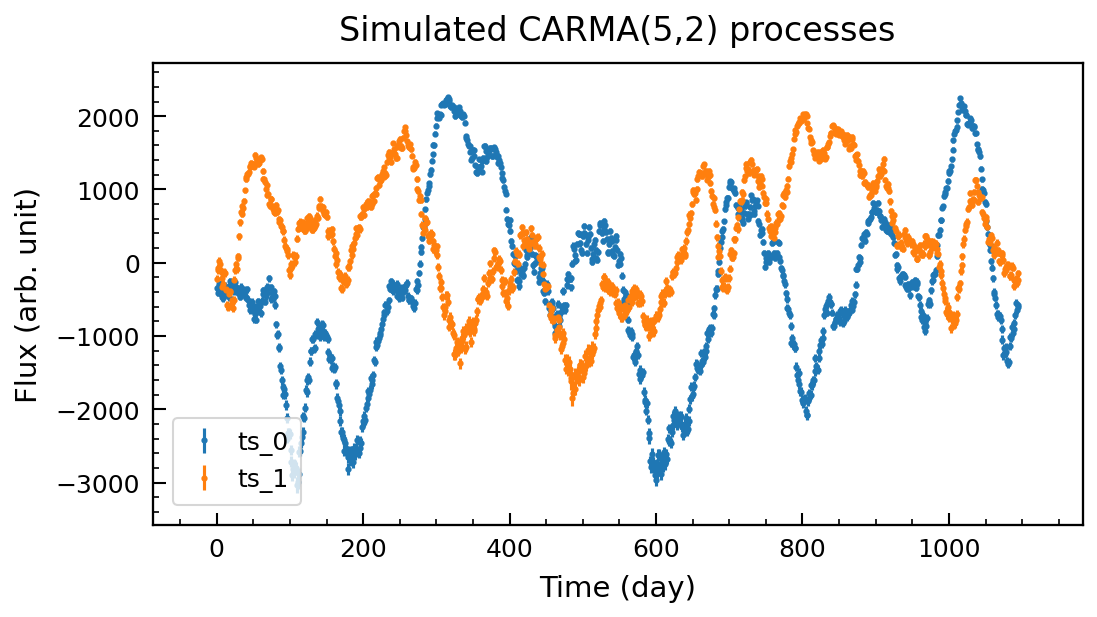

In [9]:
# plot the simulated process
fig, ax = plt.subplots(1,1, dpi=150, figsize=(8,4))

for i in range(nLC):
    ax.errorbar(t[i], y[i], yerr[i], fmt='.', label=f'ts_{i}', markersize=4)

ax.set_xlabel('Time (day)')
ax.set_ylabel('Flux (arb. unit)')
ax.set_title('Simulated CARMA(5,2) processes')
ax.legend(markerscale=1, loc=3)

- ##### At fixed input time stamps (use ``gpSimByTime``)

In [10]:
# randomly draw time stamps from a log distribution
tIn = np.logspace(0, np.log10(2000), 500)

# simulate
SNR = 20
tOut, yOut, yerrOut = gpSimByTime(carma_kernel, SNR, tIn, nLC=nLC, log_flux=False)

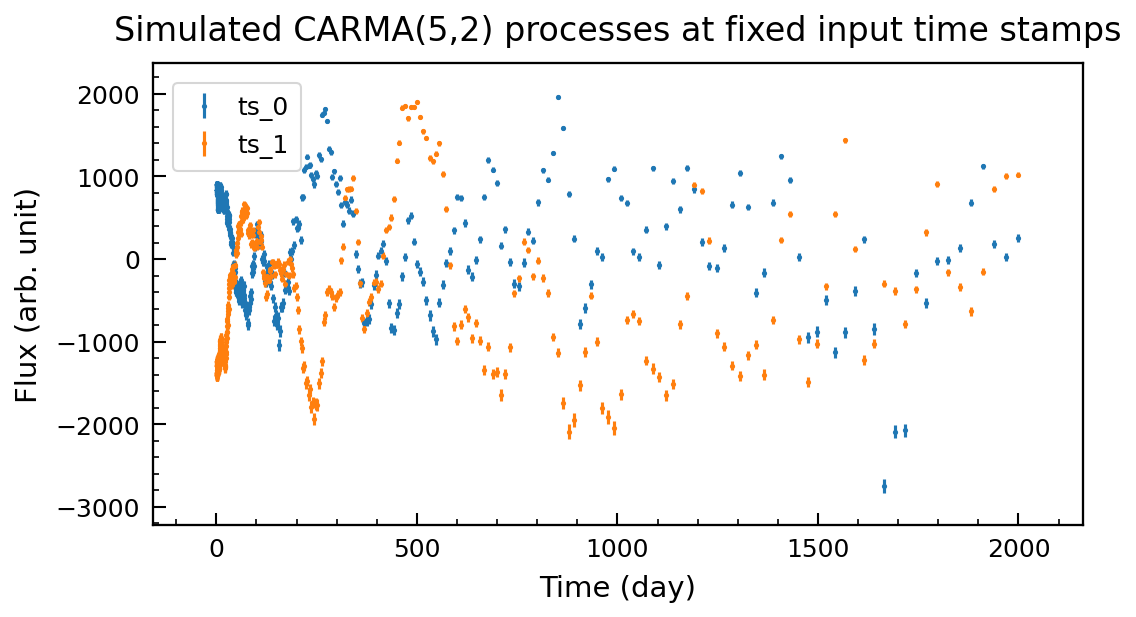

In [11]:
# plot the simulated process
fig, ax = plt.subplots(1,1, dpi=150, figsize=(8,4))

for i in range(nLC):
    ax.errorbar(tOut[i], yOut[i], yerrOut[i], fmt='.', label=f'ts_{i}', markersize=3)

ax.set_xlabel('Time (day)')
ax.set_ylabel('Flux (arb. unit)')
ax.set_title('Simulated CARMA(5,2) processes at fixed input time stamps')
ax.legend(markerscale=1)

<div class="alert alert-info">

Note 

For very high-order models (large p and q), extremely high cadence (> 1000 data points/unit time) may introduce numerical instabilities at solving the autocovariance matrix within $\mathit{celerite}$, which means that an error will be thrown. One suggested walk around is changing the time unit in your CARMA parameters (e.g., from day to hour).

</div>